<a href="https://colab.research.google.com/github/AsadullaP/Play-Store-App-Review-Analysis-/blob/main/Asadullakhan_pathan_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **                 Google Play Store Apps Exploratory Review Analysis**






> **Introduction**

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

The dataset that is going to be used is 'Google Play Store Apps' from Kaggle. It contains 10k of web scraped Play Store apps data for analysing the Android market. The tools that are going to be used for this EDA would be numpy, pandas, matplotlib and seaborn which I have learnt from the course.

**Let's take a look at the data, which consists of two files:**

**playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app. 
**user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity. Before jumping into the data's provided, let me first explain you about the EDA analysis.

**Data Preparation**

In this section, we will be loading the Google Store Apps data stored in csv using pandas which is a fast and powerful python library for data analysis and easy data manipulation in pandas DataFrame object. It is usually used for working with tabular data (e.g data in spreadsheet) in various formats such as CSV, Excel spreadsheets, HTML tables, JSON etc. We will then perform some data preparation and also cleaning on it.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#giving the path to acces the file given
data='/content/drive/MyDrive/project/Play Store Data.csv'
reviews='/content/drive/MyDrive/project/User Reviews.csv'
df_playstore_data=pd.read_csv(data)
df_user_reviews=pd.read_csv(reviews)

Now, we deep dive into data contents of both **data frames**

In [ ]:
# look at the first 5 records in the apps dataframe
df_playstore_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# look at the last 5 records in the apps dataframe
df_playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# to get all the columns of df plastore data 
df_playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

 **Description of App Dataset columns**
 
App : The name of the app       

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

In [ ]:
df_playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Data Preparation and Cleaning**

We saw that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , andAndroid Ver contains 1474, 1, 1, 8, and 3 missing values respectively.

In [ ]:
def printinfo():
    temp = pd.DataFrame(index=df_playstore_data.columns)
    temp['data_type'] = df_playstore_data.dtypes
    temp['null_count'] = df_playstore_data.isnull().sum()
    temp['unique_count'] = df_playstore_data.nunique()
    return temp

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


We have some useful information about the dataset. i.e., we can now see the missing number of values of any attribute, its unique count, and its respective data types.

In [ ]:
#Now we can start the process of data cleaning, lets start with the column Type
df_playstore_data[df_playstore_data.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
#So now we can fill the missing value with free 
df_playstore_data['Type'].fillna("Free", inplace = True)
df_playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#Now, we can move on to the column Content Rating :
df_playstore_data[df_playstore_data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


By, looking only at these rows it is not easy to say what's actually missing in this row. let us have a look at all of its near rows data. For this purpose, we have iloc and loc function.

In [ ]:
df_playstore_data.loc[10470:10474, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We can clearly see that row 10472 has missing data for the Categorycolumn and all the prevailing column values are being replaced with its previous column. A better idea will be to drop this row from our data frame.

In [ ]:
df_playstore_data.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
#We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.
df_playstore_data.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [ ]:
#Now, we can fix the Rating column which contains a total of 1474 of missing values. 
#Replacing the missing values with the Modevalue of that entire column

modeValueRating = df_playstore_data['Rating'].mode()
df_playstore_data['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [ ]:
#Finally, after fixing all the missing values, we should have a look at our data frame,
# We defined a function as printinfo() . So, it’s time to use that function.
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.

In [ ]:
# look at the first 5 records in the apps dataframe
df_user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# look at the info of the user reviews
df_user_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# go through ever column and row to figure out problem or Data Cleaning for better anylist of given DATA of user_reviews
df_user_reviews.iloc[ : ]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# to get all the columns of Data fram user_reviews
df_user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**Description of User Reviews columns**


1.   **App :-** Name  
2.  **Translated_Review:-**the act of considering something again in order to make changes to it, give an opinion of it or study it:

1.   **Sentiment:-** it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration

1.   **Sentiment_Polarity:-**Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement


2.   **Sentiment_Subjectivity:-**Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]






In [ ]:
# to get the diemenstion of data frame user review 
df_user_reviews.shape

(64295, 5)

**Exploratory Analysis and Visualization**

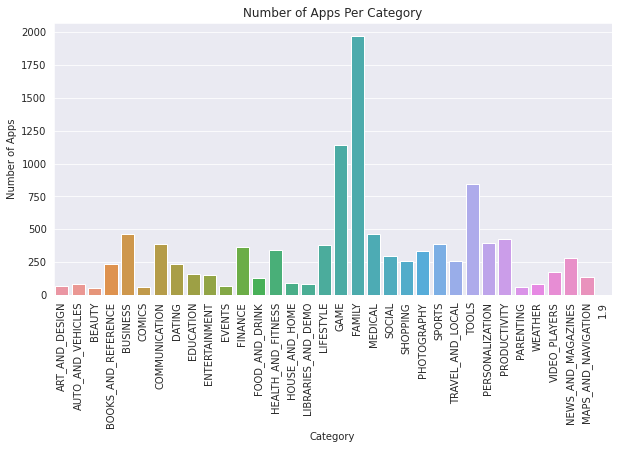

In [ ]:
#get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df_playstore_data)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools

**Rating**

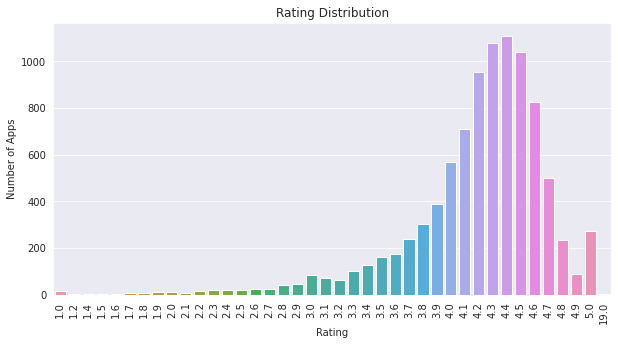

In [ ]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df_playstore_data)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7

**Application Type**

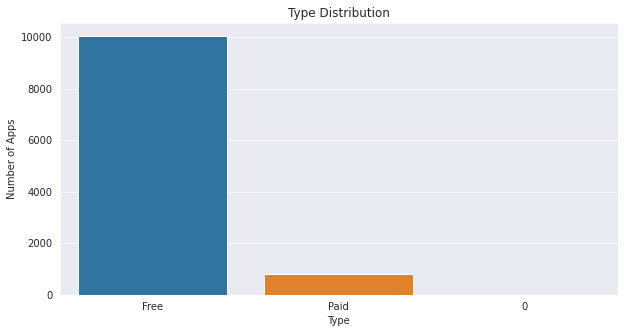

In [ ]:
# application type distribution
plt.figure(figsize=(10, 5))
sns.countplot(df_playstore_data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

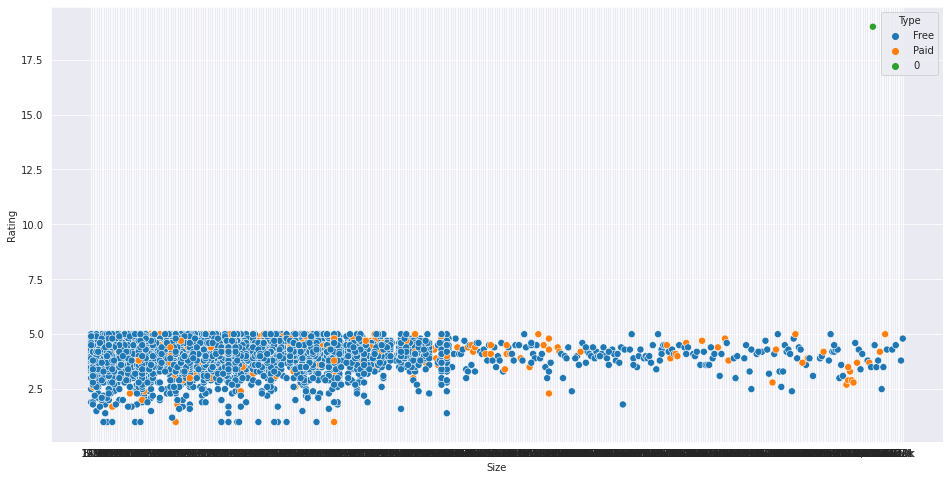

In [ ]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(16, 8))
sns.scatterplot(df_playstore_data['Size'],
               df_playstore_data['Rating'],
               hue=df_playstore_data['Type'],
               s=50)

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating

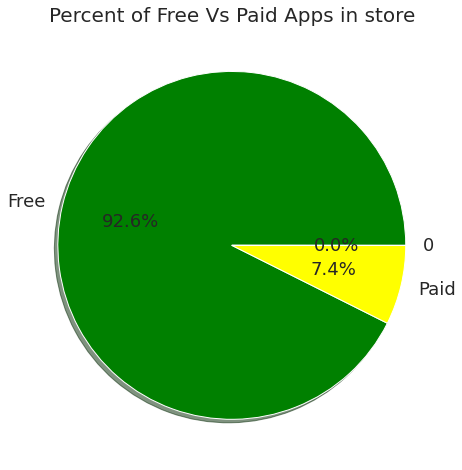

In [ ]:
plt.figure(figsize=(8,8))
labels = df_playstore_data['Type'].value_counts(sort = True).index
sizes = df_playstore_data['Type'].value_counts(sort = True)
colors = ["green","yellow"]
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0,textprops={'fontsize': 18})

plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

The above Pie-Chart represents percentage of Free apps are 92.6% and paid apps are 7.4% in dataset.

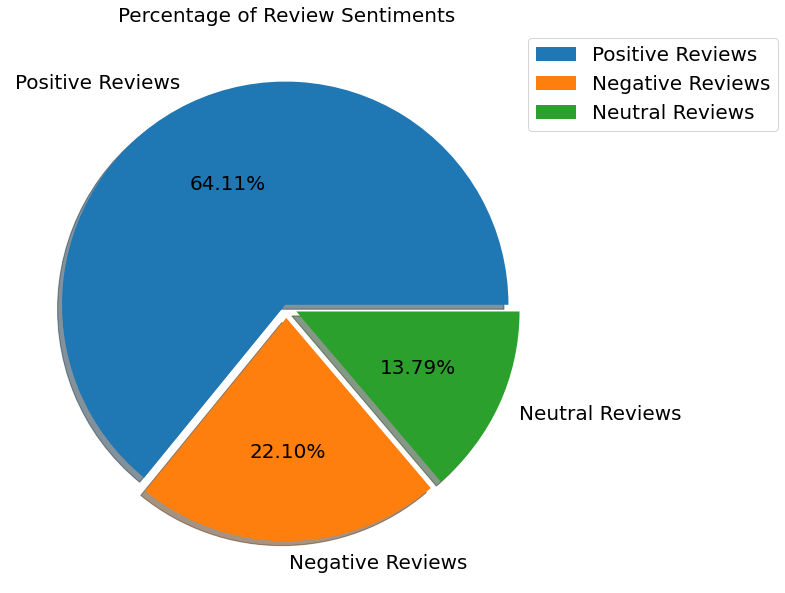

In [ ]:
counts = list(df_user_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

Positive reviews are 64.30% Negative reviews are 22.80% Neutral reviews are 12.90%

**Asking and Answering Questions**

---
**1.** What is the top 5 apps on the basis of installs?


---





In [ ]:
df =df_playstore_data.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device


In [ ]:
print(f'The 5 apps that have the most number of installs are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of installs are: Life Made WI-Fi Touchscreen Photo Frame, UC Browser - Fast Download Private & Secure, LINE: Free Calls & Messages, Flipboard: News For Our Time, Cloud Print




---
**2.** What is the top 5 reviewed apps?


---



In [ ]:

df = df_playstore_data.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
4018,GollerCepte Live Score,SPORTS,4.2,9992
401,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999
6714,SnipSnap Coupon App,SHOPPING,4.2,99759975
7441,US Open Tennis Championships 2018,SPORTS,4.0,99719971
2851,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971


In [ ]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: GollerCepte Live Score, Ad Block REMOVER - NEED ROOT, SnipSnap Coupon App, US Open Tennis Championships 2018, DreamTrips



---
**3.** What is the top 3 most installed apps in Game category?


---



In [ ]:

df = df_playstore_data[df_playstore_data['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
4041,Temple Run 2,GAME,4.3,8116142,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up




---


***4.***  Which 5 apps from the 'FAMILY' category are having the lowest rating?

---



In [ ]:
df = df_playstore_data[df_playstore_data['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21M,"1,000+",Free,0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402,1.7M,"100,000+",Free,0,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up
6135,BG TV App,FAMILY,1.7,6,2.9M,100+,Free,0,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up




---


**5.**  claculate total reviews from data frame user_reviews 

---



In [ ]:
df_user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

**Conclusion:**


most of the apps are free so developers should focus on creating free apps to have a huge customer base. If developing paid apps then apps size should not be greater than 40mb. More Apps should be in the category like Events,Beauty,Parenting as they have not been explored much but still quite popular with huge installations. In order to retain the customer base apps should be updated regularly Developers should develop apps such that their content is available for everyone. Bulky apps should be developed in the category like Game, Family. If developing paid apps then its price should not be high and size should be less than 20mb. Apps belonging to Game and Family Category have high negative reviews therefore they should be developed carefully. Like this there can be a lot of conclusions but we have tried to cover the most important ones. These are some of the aspects that the developer should research before proceeding with the app development. By conducting a simple exploratory data analysis (EDA) on the play store dataset, we not only eliminate avoidable risks of failure, but we may also be able to provide better ideas for building the app.

Percentage of free apps = ~92%

Percentage of apps with no age restrictions = ~82%

Most competitive category: Family

Category with the highest number of installs: Game

Category with the highest average app installs: Communication

Percentage of apps that are top rated = ~80%

There are 20 free apps that have been installed over a billion times

Minecraft is the only app in the paid category with over 10M installs.This app has also produced the most revenue only from the installation fee.

Category in which the paid apps have the highest average installation fee: Finance

Most popular app in the Play Store based on the number of reviews: Facebook
The median size of all apps in the play store is 12 MB.

The apps whose size varies with device has the highest number average app installs.

The apps whose size is greater than 90 MB has the highest number of average user reviews, i.e., they are more popular than the rest.


1)Positive reviews are 64.30%

2)Negative reviews are 22.80%

3)Neutral reviews are 12.90%